In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Country.csv")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df1 = df.copy()

In [7]:
df1 = df.drop(['country'], axis = 1)

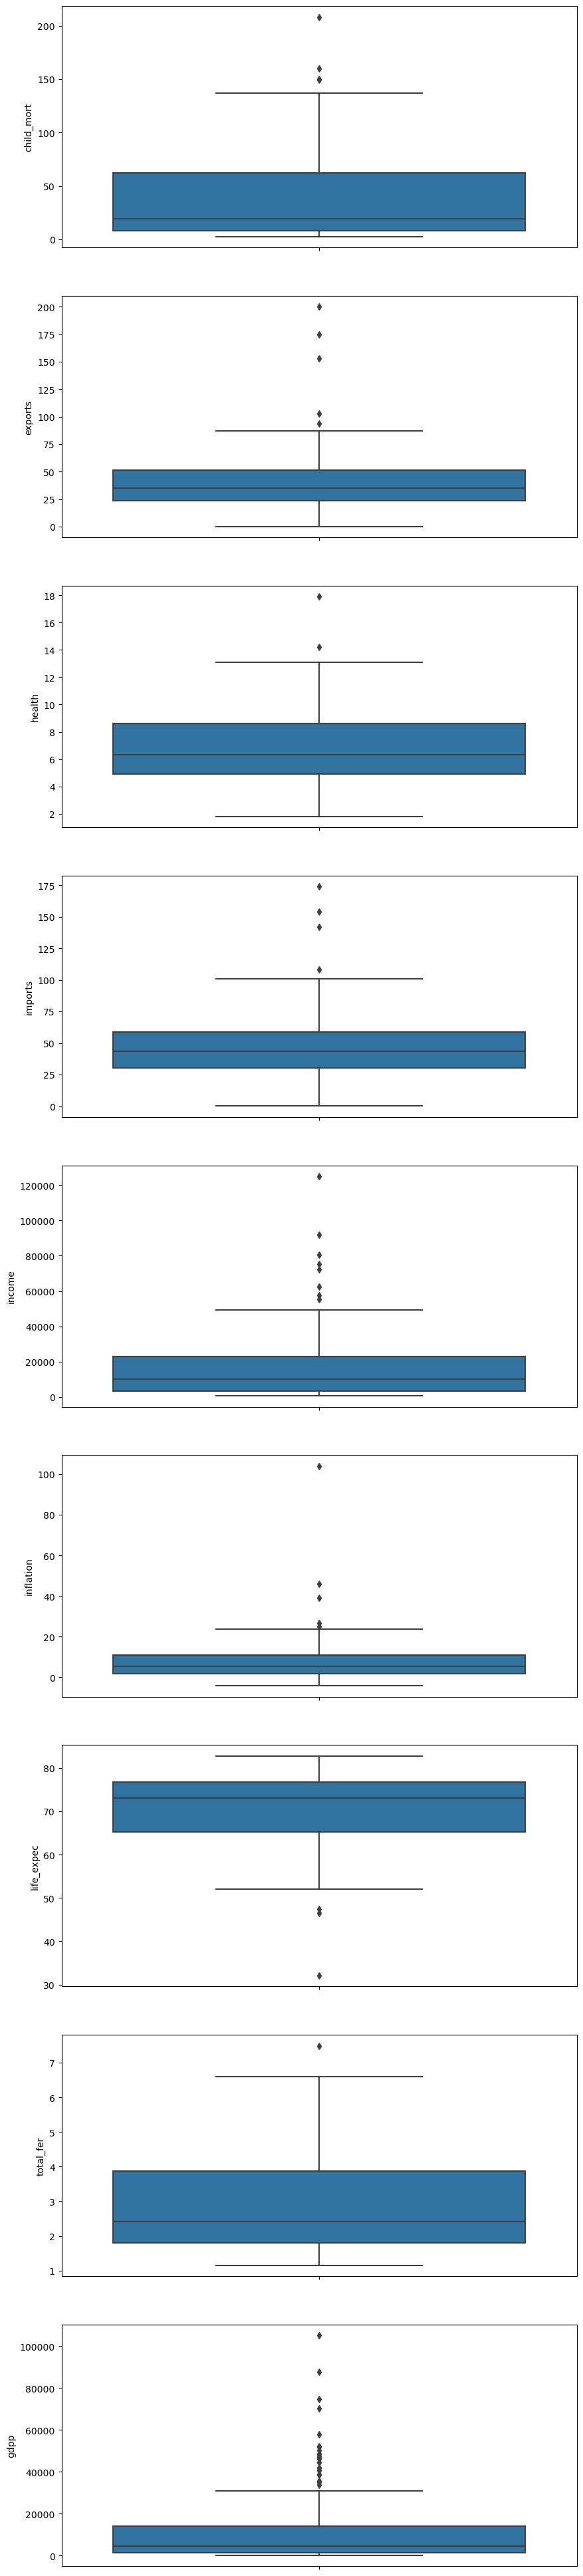

In [8]:
# Outlier detection
fig, axes = plt.subplots(nrows = len(df1.columns), figsize = (10, 50))
for i in range(len(df1.columns)):
    sns.boxplot(ax = axes[i], y = df1.columns[i], data = df1)

In [9]:
def iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        S = 1.5*IQR
        LB = Q1 - S
        UB = Q3 + S
        df.loc[df[col] > UB,col] = UB
        df.loc[df[col] < LB,col] = LB
    return df

In [10]:
iqr(df1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310


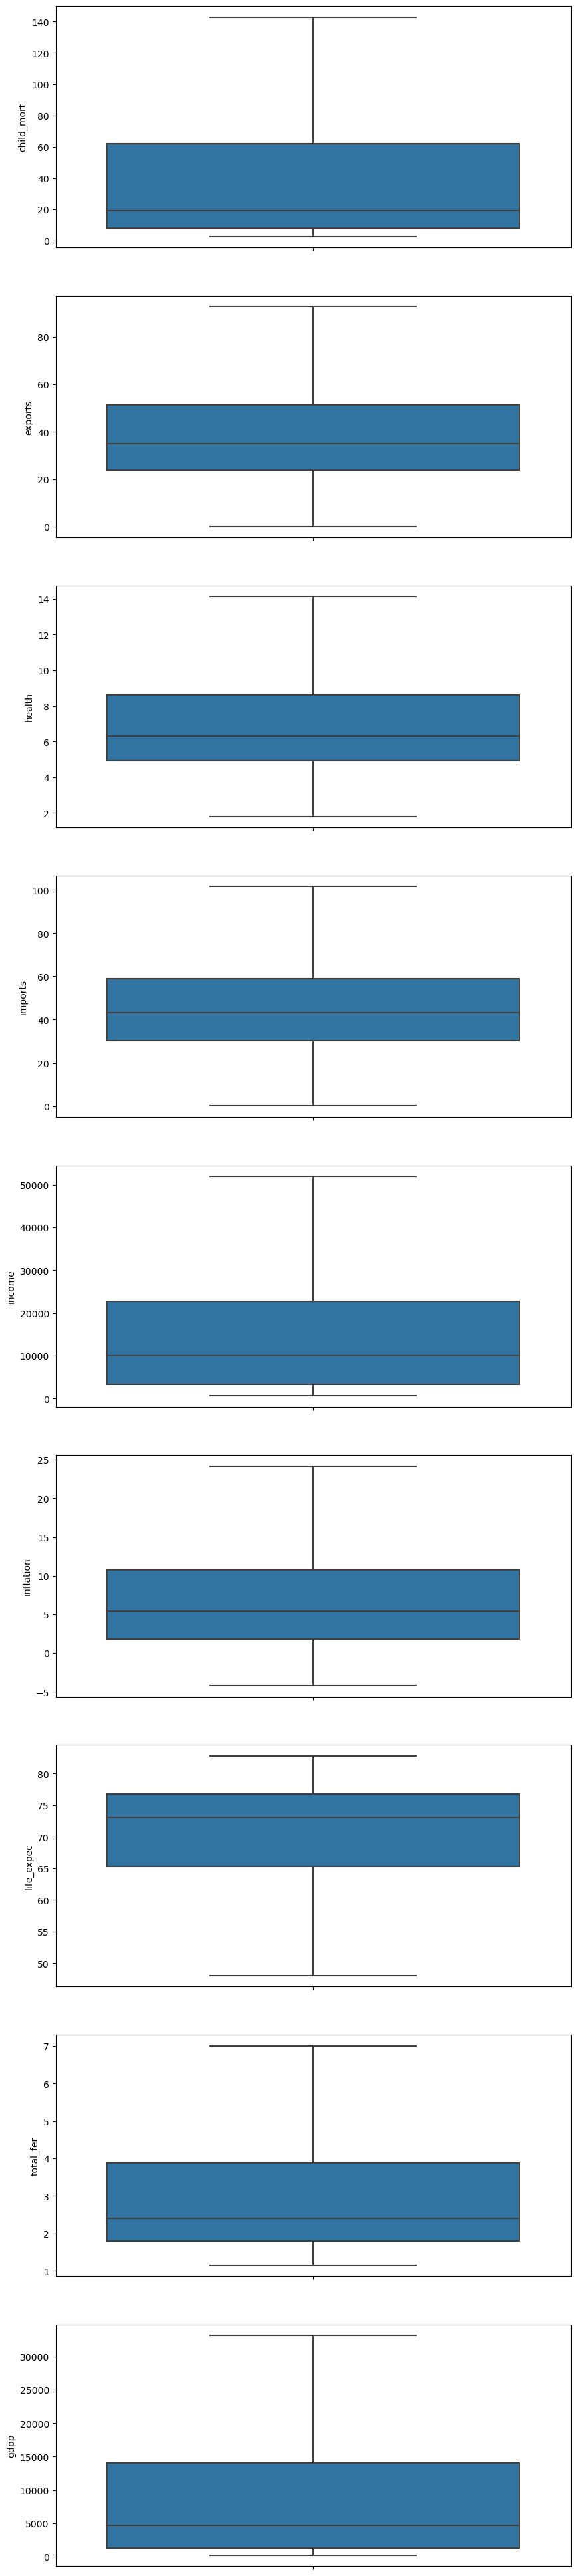

In [11]:
# Outlier detection
fig, axes = plt.subplots(nrows = len(df1.columns), figsize = (10, 50))
for i in range(len(df1.columns)):
    sns.boxplot(ax = axes[i], y = df1.columns[i], data = df1)

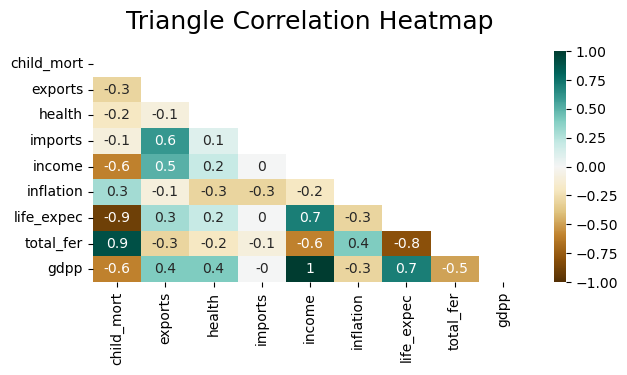

In [12]:
plt.figure(figsize=(7, 3))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(round(df1.corr(), 1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
df1['country'] = df['country']

In [14]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,Afghanistan
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,Albania
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,Algeria
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,Angola
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970,Vanuatu
163,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500,Venezuela
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310,Vietnam
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310,Yemen


In [15]:
df1.set_index('country', inplace = True)

In [16]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500.0,24.16,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310


In [17]:
scaler = StandardScaler()

features = df1.columns

df1_scaled = pd.DataFrame(scaler.fit_transform(df1[features]), columns=features, index=df1.index)

In [18]:
df1_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


## K_means 

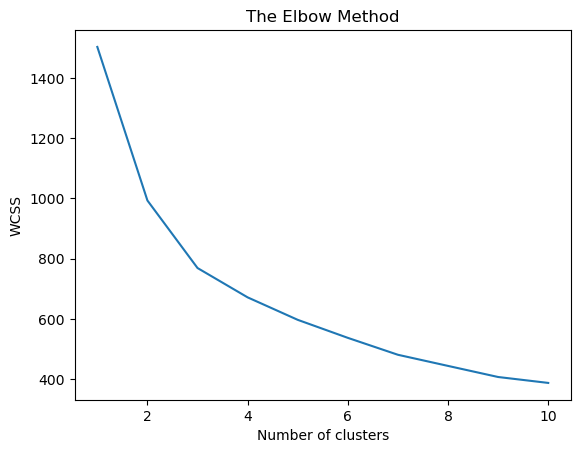

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_scaled)

In [21]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [22]:
kmeans.cluster_centers_

array([[-0.83612417,  0.62041147,  0.57869069,  0.08561565,  1.52142306,
        -0.57292049,  1.04164791, -0.76301171,  1.60817725],
       [ 1.37442214, -0.51782722, -0.1865028 , -0.2179243 , -0.79040505,
         0.46723044, -1.28773955,  1.33162209, -0.72974002],
       [-0.40629708, -0.00745082, -0.18941261,  0.08910416, -0.31331927,
         0.01362409,  0.24492223, -0.41838949, -0.39625316]])

In [23]:
#df1_scaled['k_means_clusters'] = y_kmeans

In [23]:
df1_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


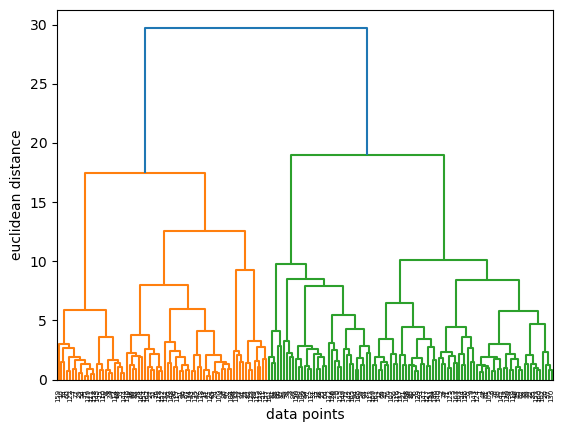

In [24]:
merg = linkage(df1_scaled,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [25]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(df1_scaled)

In [26]:
hc_predict

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [28]:
#df1_scaled['hc_clusters'] = hc_predict

In [55]:
#df1_scaled["k_means_clusters"].replace({0: 'developed', 1: 'underdeveloped', 2: 'developing'}, inplace=True)
#df1_scaled["hc_clusters"].replace({0: 'developed', 1: 'underdeveloped', 2: 'developing'}, inplace=True)

In [47]:
#df1_scaled[df1_scaled["k_means_clusters"] != df1_scaled["hc_clusters"]]

In [48]:
#df1_scaled["hc_clusters"].value_counts()

In [49]:
#df1_scaled["k_means_clusters"].value_counts()

## K_means PCA

In [28]:
pca = PCA()
pca.fit(df1_scaled)

PCA()

In [29]:
pca=PCA(n_components=2)
 
reduced_df1=pd.DataFrame(data=pca.fit_transform(df1_scaled),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_df1.head()

,PCA1,PCA2
0,-3.177917,-0.251292
1,0.434979,-0.218700
2,-0.416784,-0.613870
3,-3.306409,1.066649
4,1.253246,0.547778


In [33]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[ 2.76085927, -0.25770328],
       [-2.56716424,  0.06687146],
       [ 0.12857248,  0.09430775]])

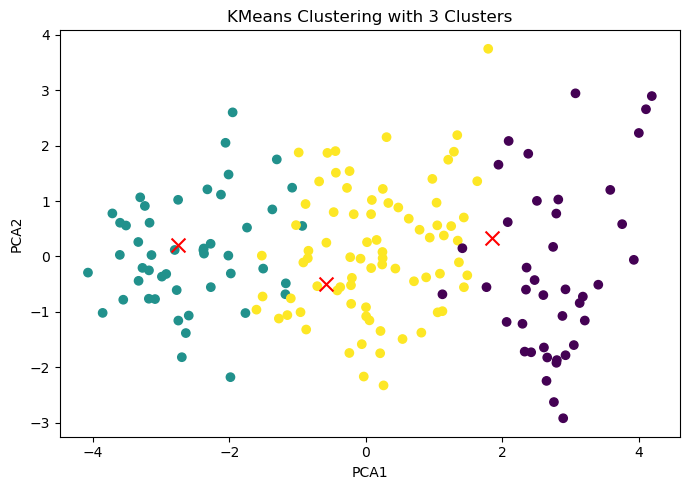

In [50]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_df1['PCA1'],reduced_df1['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering with 3 Clusters')
plt.tight_layout()

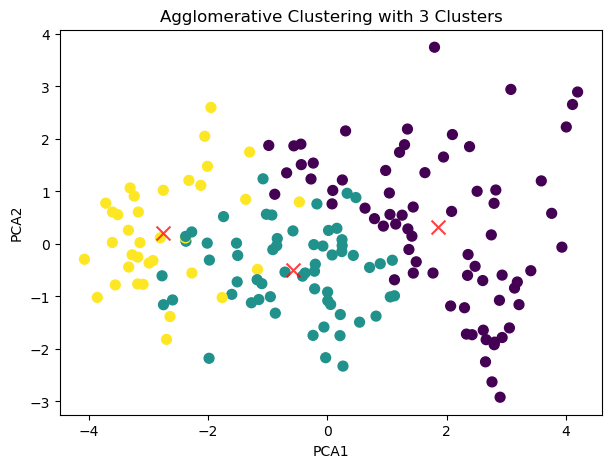

In [51]:
reduced_df1['agglo_clusters'] = hc_predict

centers = reduced_df1.groupby('agglo_clusters')[['PCA1', 'PCA2']].mean().values

plt.figure(figsize=(7, 5))
plt.title('Agglomerative Clustering with 3 Clusters')
plt.scatter(reduced_df1['PCA1'], reduced_df1['PCA2'], c=reduced_df1['agglo_clusters'], cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75, marker='x')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()